In [9]:
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fftpack import fft

from scipy.signal import butter, sosfilt
#from .utils import register_pydub_effect
import numpy as np

In [2]:
# importo audio

audio = AudioSegment.from_mp3("../audio.mp3")

In [3]:
# recorto audio

inicio_15s = 15 * 1000
inicio_audio = audio[:inicio_15s]

In [4]:
# extraigo una numpy array del audio

samples = inicio_audio.get_array_of_samples()

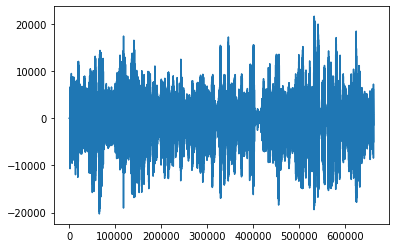

In [5]:
# Visualización audio

plt.plot(samples)

In [11]:
# Prueba
# Filter out frequencies above 500 Hz, with a 3rd order filter


filt_2 = AudioSegment.low_pass_filter(3, 1/50)

AttributeError: 'int' object has no attribute 'frame_rate'

In [6]:
b, a = signal.butter(3, 1/50)
audio_filtered = signal.filtfilt(b, a, samples)

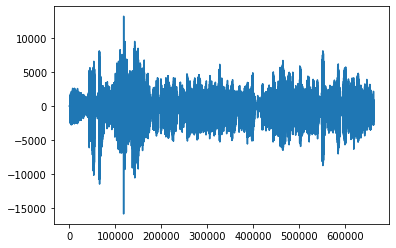

In [7]:
plt.plot(audio_filtered)

In [25]:
audio_filtered.export("../mashup.mp3", format="mp3")

AttributeError: 'numpy.ndarray' object has no attribute 'export'

In [23]:
audio_filtered.export('new.mp3', format='mp3', codec='mp3')

AttributeError: 'numpy.ndarray' object has no attribute 'export'

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


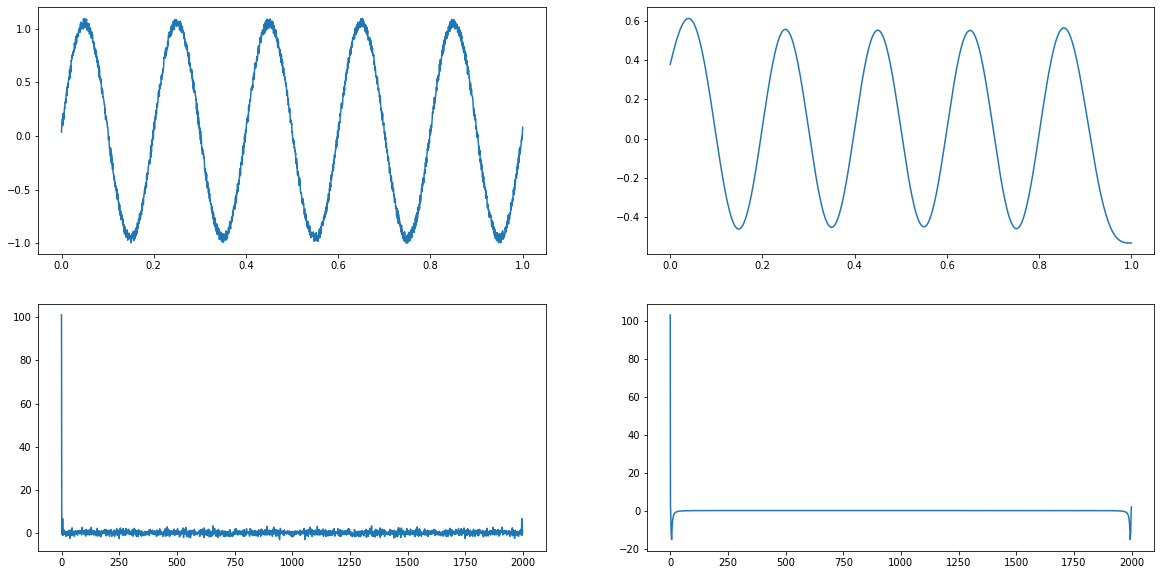

In [14]:
from scipy import signal

fm = 2000
x = np.linspace(0,1,fm)
y = np.sin(x*2*np.pi*5) + 0.1*np.random.random(len(x))


# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/fm*10)

# Aply modeled filter to data
plt.figure(figsize=(20,10))
y_filtered = signal.filtfilt(b, a, y)
plt.subplot(2,2,1)
plt.plot(x,y)
plt.subplot(2,2,2)
plt.plot(x,y_filtered)


yF = fft(y)
yF1 = fft(y_filtered)

plt.subplot(2,2,3)
plt.plot(yF[0:len(yF//2)])
plt.subplot(2,2,4)
plt.plot(yF1[0:len(yF1//2)])